In [ ]:
## Notebook env: brian_script_env (R kernel)

In [ ]:
## get number of genes above bkg (or ratio to bkg) luminal, HER2+, tnbc, etc
## plot as barplots
## or ratios of CVs also possible
## whichever most convincing
## z-scores


In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggforce))

In [6]:
## paths
path_orig = '/khayyam/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q10_q90_original/'
path_her2 = '/khayyam/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q10_q90_original_her2/'
path_luma = '/khayyam/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q10_q90_original_luminalA/'
path_lumbher2 = '/khayyam/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q10_q90_original_luminalB_her2/'
path_tnbc = '/khayyam/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q10_q90_original_tnbc/'

In [7]:
load(paste0(path_orig, 'gped_clean_df_CV_ratio_q10_q90.RData'))
grouped_dataframes_list_with_CV_ratio_cleaned_original = grouped_dataframes_list_with_CV_ratio_cleaned

load(paste0(path_her2, 'gped_clean_df_CV_ratio_q10_q90.RData'))
grouped_dataframes_list_with_CV_ratio_cleaned_her2 = grouped_dataframes_list_with_CV_ratio_cleaned

load(paste0(path_luma, 'gped_clean_df_CV_ratio_q10_q90.RData'))
grouped_dataframes_list_with_CV_ratio_cleaned_luma = grouped_dataframes_list_with_CV_ratio_cleaned

load(paste0(path_lumbher2, 'gped_clean_df_CV_ratio_q10_q90.RData'))
grouped_dataframes_list_with_CV_ratio_cleaned_lumbher2 = grouped_dataframes_list_with_CV_ratio_cleaned

load(paste0(path_tnbc, 'gped_clean_df_CV_ratio_q10_q90.RData'))
grouped_dataframes_list_with_CV_ratio_cleaned_tnbc = grouped_dataframes_list_with_CV_ratio_cleaned

In [8]:
names(grouped_dataframes_list_with_CV_ratio_cleaned_original) = sapply(grouped_dataframes_list_with_CV_ratio_cleaned_original, '[[', 1)
names(grouped_dataframes_list_with_CV_ratio_cleaned_her2) = sapply(grouped_dataframes_list_with_CV_ratio_cleaned_her2, '[[', 1)
names(grouped_dataframes_list_with_CV_ratio_cleaned_luma) = sapply(grouped_dataframes_list_with_CV_ratio_cleaned_luma, '[[', 1)
names(grouped_dataframes_list_with_CV_ratio_cleaned_lumbher2) = sapply(grouped_dataframes_list_with_CV_ratio_cleaned_lumbher2, '[[', 1)
names(grouped_dataframes_list_with_CV_ratio_cleaned_tnbc) = sapply(grouped_dataframes_list_with_CV_ratio_cleaned_tnbc, '[[', 1)

In [9]:
RNF8_q10_to_q90_CV_ratios = list('original' = grouped_dataframes_list_with_CV_ratio_cleaned_original[['RNF8']][[3]]$CV_ratio, 
'her2' = grouped_dataframes_list_with_CV_ratio_cleaned_her2[['RNF8']][[3]]$CV_ratio,
'luma' = grouped_dataframes_list_with_CV_ratio_cleaned_luma[['RNF8']][[3]]$CV_ratio,
'lumbher2' = grouped_dataframes_list_with_CV_ratio_cleaned_lumbher2[['RNF8']][[3]]$CV_ratio,
'tnbc' = grouped_dataframes_list_with_CV_ratio_cleaned_tnbc[['RNF8']][[3]]$CV_ratio)

RNF8_q90_to_q10_CV_ratios = lapply(RNF8_q10_to_q90_CV_ratios, function(x) 1/x)
RNF8_q90_to_q10_CV_ratios_log2 = lapply(RNF8_q90_to_q10_CV_ratios, log2)

RNF8_q90_to_q10_CV_ratios_log2_df = data.frame(q90_q10_CV_ratios = unlist(RNF8_q90_to_q10_CV_ratios_log2, use.names = FALSE), 
                 group = unlist(mapply(FUN = function(x, y) rep(y, length(x)), RNF8_q90_to_q10_CV_ratios_log2, c('Total', 'HER2+', 'Luminal A', 'Luminal B HER2+', 'TNBC'), SIMPLIFY = TRUE), use.names = FALSE))

RNF8_q90_to_q10_CV_ratios_log2_df$group = factor(RNF8_q90_to_q10_CV_ratios_log2_df$group, levels = c('Total', 'HER2+', 'Luminal A', 'Luminal B HER2+', 'TNBC'))


In [10]:
MIS18A_q10_to_q90_CV_ratios = list('original' = grouped_dataframes_list_with_CV_ratio_cleaned_original[['MIS18A']][[3]]$CV_ratio, 
'her2' = grouped_dataframes_list_with_CV_ratio_cleaned_her2[['MIS18A']][[3]]$CV_ratio,
'luma' = grouped_dataframes_list_with_CV_ratio_cleaned_luma[['MIS18A']][[3]]$CV_ratio,
'lumbher2' = grouped_dataframes_list_with_CV_ratio_cleaned_lumbher2[['MIS18A']][[3]]$CV_ratio,
'tnbc' = grouped_dataframes_list_with_CV_ratio_cleaned_tnbc[['MIS18A']][[3]]$CV_ratio)

MIS18A_q90_to_q10_CV_ratios = lapply(MIS18A_q10_to_q90_CV_ratios, function(x) 1/x)
MIS18A_q90_to_q10_CV_ratios_log2 = lapply(MIS18A_q90_to_q10_CV_ratios, log2)

MIS18A_q90_to_q10_CV_ratios_log2_df = data.frame(q90_q10_CV_ratios = unlist(MIS18A_q90_to_q10_CV_ratios_log2, use.names = FALSE), 
                 group = unlist(mapply(FUN = function(x, y) rep(y, length(x)), MIS18A_q90_to_q10_CV_ratios_log2, c('Total', 'HER2+', 'Luminal A', 'Luminal B HER2+', 'TNBC'), SIMPLIFY = TRUE), use.names = FALSE))

MIS18A_q90_to_q10_CV_ratios_log2_df$group = factor(MIS18A_q90_to_q10_CV_ratios_log2_df$group, levels = c('Total', 'HER2+', 'Luminal A', 'Luminal B HER2+', 'TNBC'))

### CV ratios violin plots ###

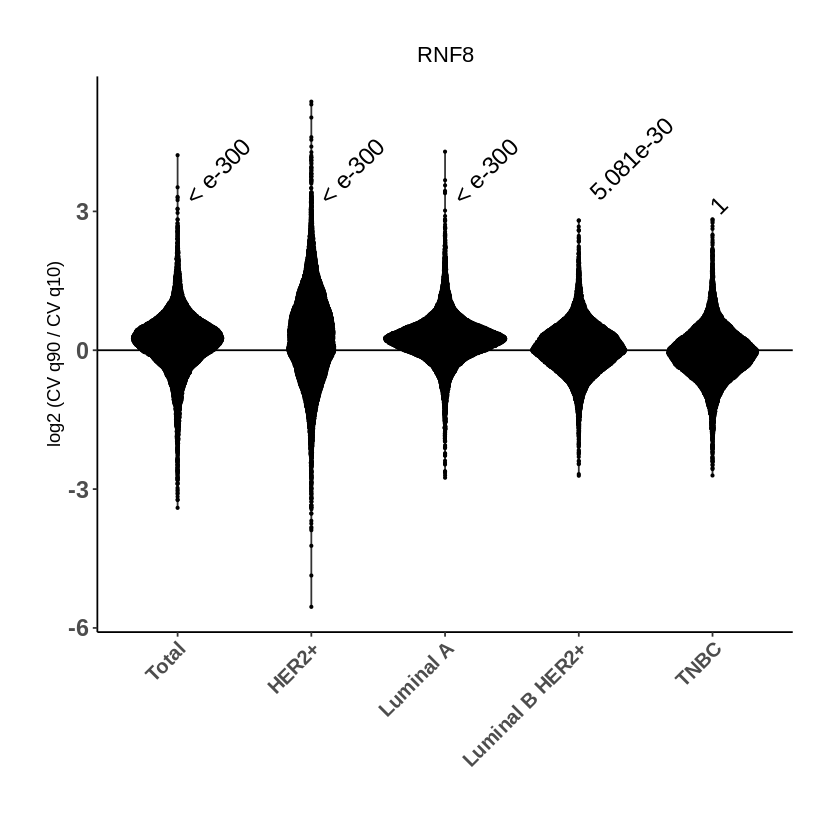

In [11]:
## RNF8 ##
tests = lapply(RNF8_q90_to_q10_CV_ratios_log2, t.test, mu = 0, alternative = 'greater')
pvals = as.numeric(lapply(tests, function(x) return(x$p.val)))
pvals_adj = signif(p.adjust(pvals), 4)
pvals_adj[pvals_adj == 0] = '< e-300'

ggplot(RNF8_q90_to_q10_CV_ratios_log2_df, aes(group, q90_q10_CV_ratios, fill = group)) + ylab('log2 (CV q90 / CV q10)') +
  geom_violin(position=position_dodge()) + annotate("text", x = 1:length(unique(RNF8_q90_to_q10_CV_ratios_log2_df$group)), y = 3, size = 5, angle='45', hjust = -0.2, label = pvals_adj) +
  geom_sina(position=position_dodge(), size = 0.5) + geom_hline(yintercept = 0) + coord_cartesian(clip = 'off') + xlab('') + ggtitle('RNF8') +
  theme_classic() + theme(plot.margin = margin(1,1,1,1, "cm"), plot.title = element_text(hjust = 0.5), legend.position = 'none', axis.text.y = element_text(face = 'bold', size = 14), axis.text.x = element_text(face = 'bold', size = 12, angle = 45, hjust = 1))

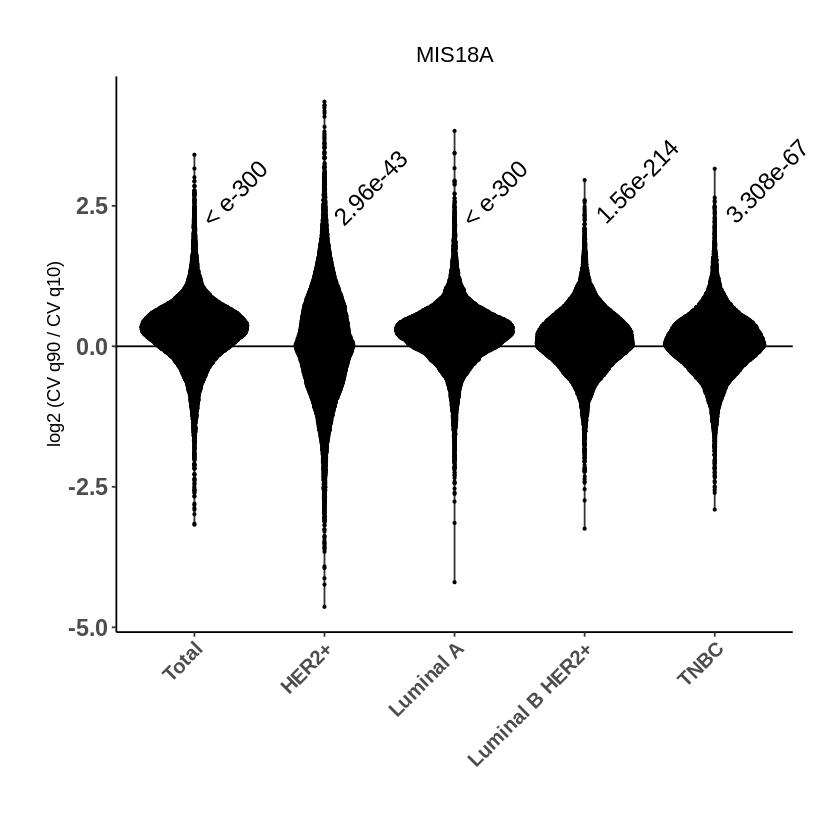

In [12]:
## MIS18A ##
tests = lapply(MIS18A_q90_to_q10_CV_ratios_log2, t.test, mu = 0, alternative = 'greater')
pvals = as.numeric(lapply(tests, function(x) return(x$p.val)))
pvals_adj = signif(p.adjust(pvals), 4)
pvals_adj[pvals_adj == 0] = '< e-300'

ggplot(MIS18A_q90_to_q10_CV_ratios_log2_df, aes(group, q90_q10_CV_ratios, fill = group)) + ylab('log2 (CV q90 / CV q10)') +
  geom_violin(position=position_dodge()) + annotate("text", x = 1:length(unique(MIS18A_q90_to_q10_CV_ratios_log2_df$group)), y = 2, size = 5, angle='45', hjust = -0.2, label = pvals_adj) +
  geom_sina(position=position_dodge(), size = 0.5) + geom_hline(yintercept = 0) + coord_cartesian(clip = 'off') + xlab('') + ggtitle('MIS18A') +
  theme_classic() + theme(plot.margin = margin(1,1,1,1, "cm"), plot.title = element_text(hjust = 0.5), legend.position = 'none', axis.text.y = element_text(face = 'bold', size = 14), axis.text.x = element_text(face = 'bold', size = 12, angle = 45, hjust = 1))